# Try Graph Hierarchical Clusterng

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from graspologic.partition import hierarchical_leiden

c:\Users\super\anaconda3\envs\ai-assignment4-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def visualize_clusters(partition, G):
    pos = nx.spring_layout(G)
    communities = set(partition.values())

    color_map = {}
    colors = plt.cm.get_cmap('hsv', len(communities))
    for idx, community in enumerate(communities):
        color_map[community] = colors(idx)
    
    node_colors = [color_map[partition[node]] for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=300, alpha=0.8)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=10)

    plt.title("Community Detection using Hierarchical Leiden Algorithm")
    plt.axis('off')
    plt.show()

C:\Users\super\AppData\Local\Temp\ipykernel_33948\875357728.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('hsv', len(communities))


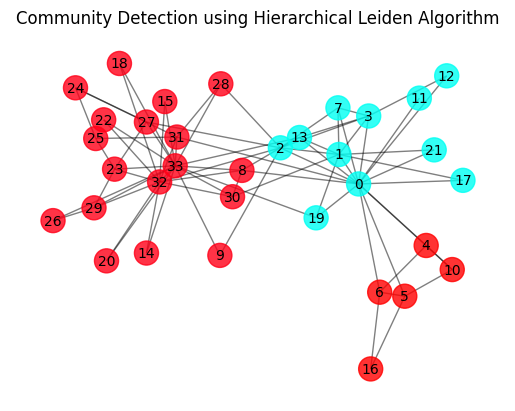

In [3]:
G = nx.karate_club_graph()  # Zachary's Karate Club graph as an example
clusters = hierarchical_leiden(G, random_seed=12345, max_cluster_size=5)
partition = clusters.first_level_hierarchical_clustering()
visualize_clusters(partition, G)

C:\Users\super\AppData\Local\Temp\ipykernel_33948\875357728.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('hsv', len(communities))


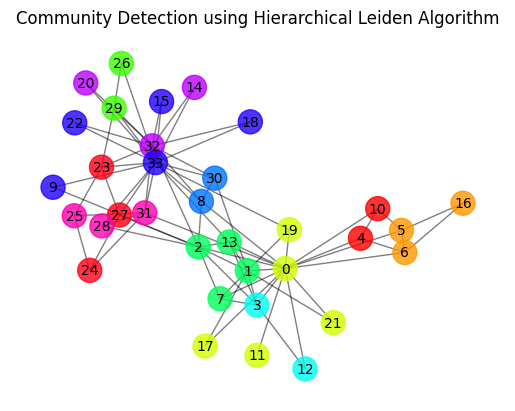

In [4]:
partition = clusters.final_level_hierarchical_clustering()
visualize_clusters(partition, G)

## Extract as Dict of levels

In [5]:
results: dict[int, dict[str, int]] = {}
for partition in clusters:
    results[partition.level] = results.get(partition.level, {})
    results[partition.level][partition.node] = partition.cluster

In [6]:
results

{0: {4: 0,
  5: 0,
  6: 0,
  10: 0,
  16: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  7: 1,
  11: 1,
  12: 1,
  13: 1,
  17: 1,
  19: 1,
  21: 1,
  8: 2,
  31: 2,
  30: 2,
  9: 2,
  27: 2,
  28: 2,
  32: 2,
  33: 2,
  14: 2,
  15: 2,
  18: 2,
  20: 2,
  22: 2,
  23: 2,
  25: 2,
  29: 2,
  24: 2,
  26: 2},
 1: {4: 3,
  10: 3,
  6: 4,
  5: 4,
  16: 4,
  0: 5,
  11: 5,
  17: 5,
  19: 5,
  21: 5,
  1: 6,
  2: 6,
  3: 6,
  7: 6,
  12: 6,
  13: 6,
  8: 7,
  30: 7,
  32: 7,
  33: 7,
  9: 7,
  14: 7,
  15: 7,
  18: 7,
  20: 7,
  22: 7,
  31: 8,
  28: 8,
  25: 8,
  24: 8,
  27: 8,
  23: 8,
  29: 9,
  26: 9},
 2: {1: 10,
  2: 10,
  7: 10,
  13: 10,
  3: 11,
  12: 11,
  8: 12,
  30: 12,
  33: 13,
  9: 13,
  15: 13,
  18: 13,
  22: 13,
  32: 14,
  14: 14,
  20: 14,
  31: 15,
  28: 15,
  25: 15,
  24: 16,
  27: 16,
  23: 16}}